<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5

## Deep Learning for Computer Vision

In [2]:
import keras
from google.colab import drive, files
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")


Using TensorFlow backend.


### Convolutional networks

Here's a basic MNIST classifier made up `Conv2D` and `MaxPooling2D` layers

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))

W0614 19:31:39.983044 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 19:31:40.007148 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 19:31:40.010866 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 19:31:40.047506 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# Display the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Connect this convnet to a classifier network - a stack of `Dense` layers
# These process vectors, so we have to flatten the 3D tensor

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [0]:
# Now train on MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") /255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") /255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step


W0614 19:31:43.742312 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 19:31:43.770268 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 19:31:43.882131 140068333918080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 19:31:44.002884 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.1782 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.0473 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 53s 886us/step - loss: 0.0336 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 53s 885us/step - loss: 0.0259 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 53s 876us/step - loss: 0.0213 - acc: 0.9934


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

10000/10000 [==============================] - 3s 301us/step
Test accuracy: 0.9919


### ConvNets on the Cats and Dogs dataset

Here we'll look at a sample of 4,000 photos of cats and dogs, and train on 2,000 of them. Naively training a convnet will result in overfitting, which we'll sort with data augmentation. Then we'll use a pre-trained model to get top accuracy.

In [3]:

drive.mount('/content/drive/')
path = "/content/drive/My Drive/Colab Notebooks/dogs-vs-cats.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# For odd historic reasons, the directory is called train
shutil.move("/tmp/train", "/tmp/dogs_vs_cats")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


'/tmp/dogs_vs_cats'

In [0]:
# Create the test_train directory structure

original_dir = '/tmp/dogs_vs_cats'

base_dir = "/tmp/cats_and_dogs_small"
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# As above, for the validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


# As above, for the test set
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# The first 1000 cats are for training
fnames = [f"cat.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"cat.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"cat.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src,dst)

  
# The first 1000 dogs are for training
fnames = [f"dog.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"dog.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"dog.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src,dst)

In [5]:

  
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
# Now lets build a convnet with ConvNet2D and MaxPooling layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

W0615 10:43:42.452459 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 10:43:42.510706 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 10:43:42.522788 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 10:43:42.577131 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

W0615 10:45:29.010018 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 10:45:29.020047 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 10:45:29.027405 140708854994816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The steps for getting the data off the drive, where it is stored as JPEGs, are as follows:
- Read the picture files
- Decode the JPEG to RBG pixel grids
- Convert these to floating-point tensors
- Rescale from [0,255] to [0,1]

The `ImageDataGenerator` does all the processing work 

In [0]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Fit with a generator. The generator will yield data endlessly so you have to tell keras
# when to stop, with the steps_per_epoch flag

history = model.fit_generator(train_generator,
                              steps_per_epoch=100, # 100 batches of 20 samples = 2000 images
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

W0615 10:54:37.662449 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 120s 1s/step - loss: 0.6890 - acc: 0.5435 - val_loss: 0.6781 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 119s 1s/step - loss: 0.6469 - acc: 0.6340 - val_loss: 0.7166 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 119s 1s/step - loss: 0.6027 - acc: 0.6755 - val_loss: 0.6092 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.5546 - acc: 0.7175 - val_loss: 0.5882 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.5299 - acc: 0.7395 - val_loss: 0.5964 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 118s 1s/step - loss: 0.5063 - acc: 0.7545 - val_loss: 0.5775 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.4791 - acc: 0.7630 - val_loss: 0.6046 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 119s 1s/step - 

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_1.h5")

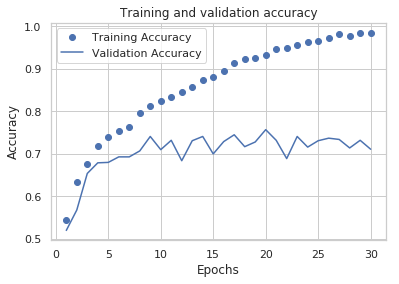

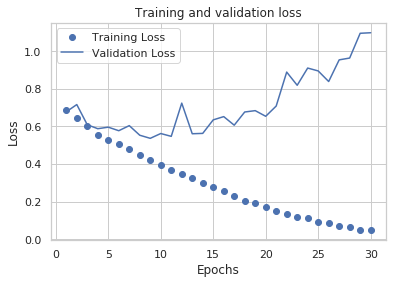

In [0]:
# Plot the loss and accuracy of the model over the training and validation data

# Looks overfit beyond belief to me! We have a History object that can tell us more 

history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




### Data augmentation

Above: textbook overfitting, which Chollet thinks is because I don't have many samples. We can fix this using data augmentation, transforming the input images with random transformations (e.g. rotation, reflection, translation) that should still result in obvious cats/dogs. 

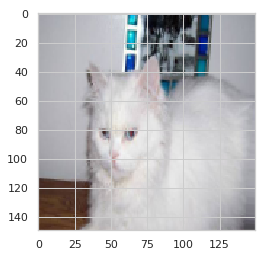

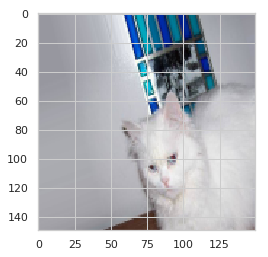

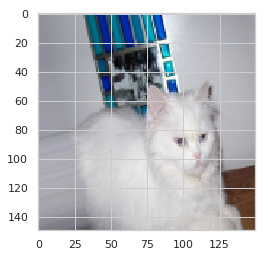

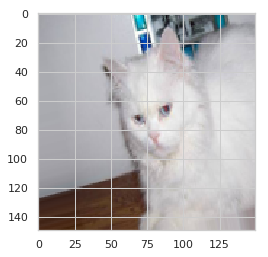

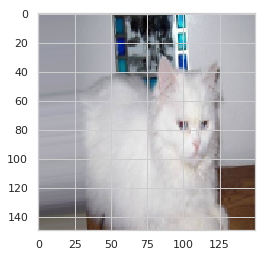

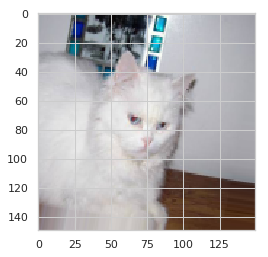

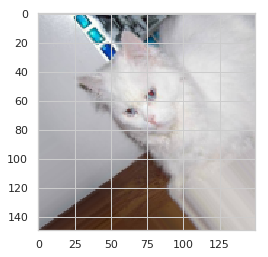

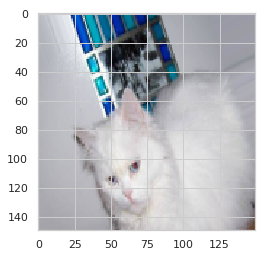

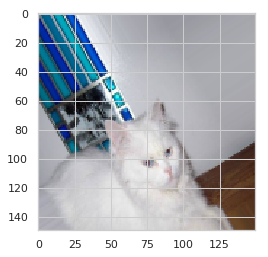

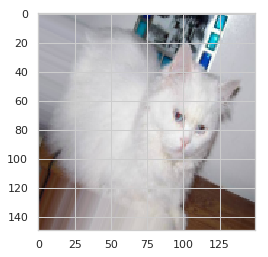

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                         width_shift_range=0.2,
                                                         height_shift_range=0.2,
                                                         shear_range=0.2,
                                                         zoom_range=0.2,
                                                         horizontal_flip=True,
                                                         fill_mode="nearest"
                                                        )
# rescale=1./255 not used here

# Let's look at these images

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
# Read and resize the image
img  = keras.preprocessing.image.load_img(img_path, target_size=(150,150))
# Convert to a Numpy array with shape (150,150,3)
x = keras.preprocessing.image.img_to_array(img)
# Reshape to (1,150,150,3)
x = x.reshape((1,) + x.shape)

# Generate batches of randomly transformed images. Loops indefinitely, unless broken!
i = 0
for batch in datagen.flow(x, batch_size=1):
  imgplot = plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
  plt.show()
  i += 1
  if i == 10:
    break


Now the network will  never see the same image twice.  But the inputs are still highly correlated, so to further fight overfitting we'll add a `Dropout` layer.

In [0]:
# Now lets build a convnet with ConvNet2D and MaxPooling layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

W0616 11:50:13.595947 140576677336960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 11:50:13.666288 140576677336960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 11:50:13.676002 140576677336960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 11:50:13.733839 140576677336960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0616 11:50:13.804893 140576677336960 deprecation_wrapp

In [0]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True
                                                            )
# Note we don't augment the validation data!
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode="binary")

history = model.fit_generator(train_generator,
                              steps_per_epoch=100, # 100 batches of 20 samples = 2000 images
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 191s 2s/step - loss: 0.6923 - acc: 0.5297 - val_loss: 0.6784 - val_acc: 0.5749
Epoch 2/100
100/100 [==============================] - 186s 2s/step - loss: 0.6776 - acc: 0.5719 - val_loss: 0.6776 - val_acc: 0.5406
Epoch 3/100
100/100 [==============================] - 186s 2s/step - loss: 0.6525 - acc: 0.6116 - val_loss: 0.6324 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 186s 2s/step - loss: 0.6331 - acc: 0.6347 - val_loss: 0.6895 - val_acc: 0.5799
Epoch 5/100
100/100 [==============================] - 186s 2s/step - loss: 0.6250 - acc: 0.6456 - val_loss: 0.6206 - val_acc: 0.6237
Epoch 6/100
100/100 [==============================] - 186s 2s/step - loss: 0.6156 - acc: 0.6688 - val_loss: 0.5895 - val_acc: 0.6740
Epoch 7/100
100/100 [==============================] - 188s 2s/step - loss: 0.5929 - acc: 0.6825 - val_loss: 0.5

In [0]:
model.save("cats_and_dogs_small_2.h5")

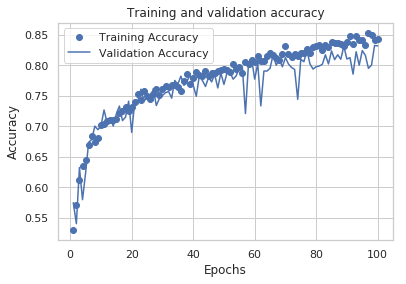

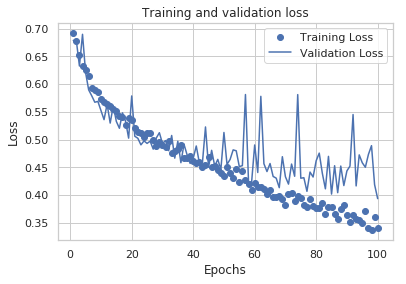

In [0]:
# Plot the loss and accuracy of the model over the training and validation data
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




## Using pretrained convnets

### Feature extraction

Here we take a large convnet trained on the ImageNet dataset (here the VGG16 architecture) and applying it to our dataset. We can use the representations learned in that network to extract interesting features from new samples, and then run those features through a new classifier, trained from scratch.

In [0]:
# Include_top refers to the dense classifier on top of the convolutional base, which we omit here.
conv_base = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))

W0617 09:00:38.119112 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 09:00:38.171780 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 09:00:38.181523 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 09:00:38.241884 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0617 09:00:40.398886 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 09:00:40.400300 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are two options at this point:

1.   Run the convolutional base over the dataset, record its output as a Numpy array on disk, then train a standalone dense classifier on those arrays. This is fast and cheap, but e.g. stops us using data augmentation
2.   Stick a Dense layer on top of our model, the run the whole thing end to end.

In [11]:
# Fast feature extraction without data augmentation


# Create the test_train directory structure


base_dir = "/tmp/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          class_mode="binary")
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    print(i)
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels



train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Found 1000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Found 1000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [0]:
# The extracted features are of shape (samples, 4,4,512), so we need to flatten them:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [15]:
# Run the Dense classifier
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_dim=4*4*512))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"]
             )

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

W0617 09:36:02.603422 140544694261632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0617 09:36:02.645134 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 09:36:02.657738 140544694261632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6374 - acc: 0.6380 - val_loss: 0.4357 - val_acc: 0.8490
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4284 - acc: 0.8030 - val_loss: 0.3537 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3658 - acc: 0.8420 - val_loss: 0.3186 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3208 - acc: 0.8680 - val_loss: 0.2967 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2793 - acc: 0.8850 - val_loss: 0.2785 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2630 - acc: 0.8990 - val_loss: 0.2727 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2465 - acc: 0.9010 - val_loss: 0.2708 - val_acc: 0.8870
Epoch 8/30
200

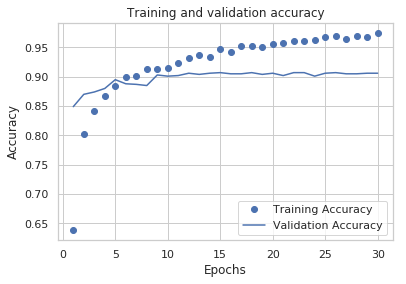

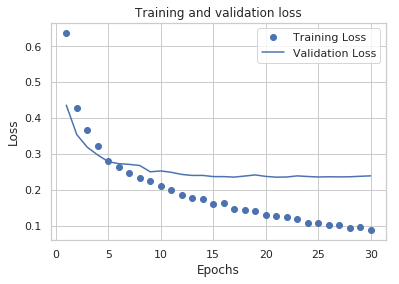

In [16]:
# Plot the loss and accuracy of the model over the training and validation data
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




The validation accuracy is now up to 90% - so we've already done better than we could have done  with our tiny convnet. But we're still overfitting! So let's do data augmentation.

In [1]:
# Feature extraction, with data augmentation
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

NameError: ignored

In [20]:
# Freeze the convolutional base, otherwise its weights will be destroyed by the random
# initialisation of the Dense layers on top during training.

print(f"There are {len(model.trainable_weights)} trainable weights before freezing the conv base.")
conv_base.trainable = False
# There are 4 weight tensors - two per Dense layer (weights and bias).
print(f"There are {len(model.trainable_weights)} trainable weights after freezing the conv base.")


There are 30 trainable weights before freezing the conv base.
There are 4 trainable weights after freezing the conv base.


In [21]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True,
                                                             fill_mode="nearest"
                                                            )
# Note we don't augment the validation data!
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")

model.compile(loss="binary_crossentropy",
             optimizer=keras.optimizers.RMSprop(lr=2e-5),
             metrics=["acc"])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 673s 7s/step - loss: 0.6037 - acc: 0.6695 - val_loss: 0.4760 - val_acc: 0.7720
Epoch 2/30
100/100 [==============================] - 667s 7s/step - loss: 0.4845 - acc: 0.7775 - val_loss: 0.3587 - val_acc: 0.8530
Epoch 3/30
100/100 [==============================] - 656s 7s/step - loss: 0.4254 - acc: 0.8110 - val_loss: 0.3171 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 650s 7s/step - loss: 0.3994 - acc: 0.8255 - val_loss: 0.3080 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 606s 6s/step - loss: 0.3850 - acc: 0.8340 - val_loss: 0.2799 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 613s 6s/step - loss: 0.3761 - acc: 0.8385 - val_loss: 0.2731 - val_acc: 0.8970
Epoch 7/30
100/100 [==============================] - 588s 6s/step - loss: 0.3597 - acc: 0.8420 - val_loss: 0.2655 - v

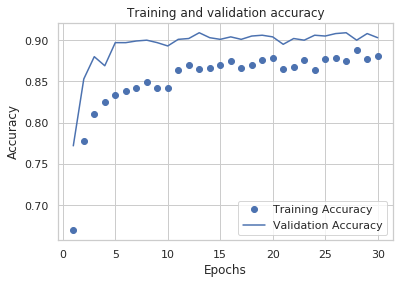

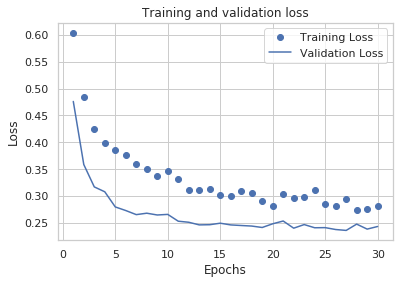

In [23]:
# Plot the loss and accuracy of the model over the training and validation data
def plotLossAndAccuracy(history):
  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, acc, "bo", label="Training Accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plotLossAndAccuracy(history)

